In [97]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns 
import matplotlib.ticker as mtick   

In [98]:
# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [99]:

df = pd.read_json("data_10_pages.json", lines=True)

df.head()

,title,detail_url,year,fuel,engine,transmission,grade,Registered In,Color,Assembly,Engine Capacity,Body Type,Last Updated,Ad Ref #,price,mileage
0,Toyota Raize 2020 Z for Sale,https://www.pakwheels.com/used-cars/toyota-rai...,2020,Petrol,1000 cc,Automatic,None,Un-Registered,Black Mica Metallic,Imported,1000 cc,Crossover,"Nov 20, 2025",10848041,6200000.0,48000
1,Toyota Estima 2010 Hybrid for Sale,https://www.pakwheels.com/used-cars/toyota-est...,2010,Hybrid,2400 cc,Automatic,None,Sindh,Black,Imported,2400 cc,Mini Van,"Nov 20, 2025",10709875,4675000.0,90000
2,Honda Vezel 2014 Hybrid X for Sale,https://www.pakwheels.com/used-cars/honda-veze...,2014,Hybrid,1500 cc,Automatic,None,Karachi,Black,Imported,1500 cc,Crossover,"Nov 20, 2025",10686699,3950000.0,79000
3,Audi e-tron 2022 50 quattro 230 kW for Sale,https://www.pakwheels.com/used-cars/audi-e-tro...,2022,Electric,60.0 kWh,Automatic,None,Sindh,Antigua Blue Metallic,Imported,None,SUV,"Nov 20, 2025",10737836,1.0,8000
4,Honda Civic 2018 Oriel 1.8 i-VTEC CVT for Sale,https://www.pakwheels.com/used-cars/honda-civi...,2018,Petrol,1800 cc,Automatic,None,Sindh,Lunar Silver Metallic,Local,1800 cc,Sedan,"Nov 20, 2025",10795768,4650000.0,71000


In [100]:
df.isnull().sum()

title                0
detail_url           0
year                 0
fuel                 0
engine               0
transmission         0
grade              338
Registered In        0
Color                0
Assembly             0
Engine Capacity      4
Body Type            0
Last Updated         0
Ad Ref #             0
price                3
mileage              0
dtype: int64

In [101]:
df = df.drop('grade', axis=1)
df = df.drop('detail_url', axis=1)
df

,title,year,fuel,engine,transmission,Registered In,Color,Assembly,Engine Capacity,Body Type,Last Updated,Ad Ref #,price,mileage
0,Toyota Raize 2020 Z for Sale,2020,Petrol,1000 cc,Automatic,Un-Registered,Black Mica Metallic,Imported,1000 cc,Crossover,"Nov 20, 2025",10848041,6200000.0,48000
1,Toyota Estima 2010 Hybrid for Sale,2010,Hybrid,2400 cc,Automatic,Sindh,Black,Imported,2400 cc,Mini Van,"Nov 20, 2025",10709875,4675000.0,90000
2,Honda Vezel 2014 Hybrid X for Sale,2014,Hybrid,1500 cc,Automatic,Karachi,Black,Imported,1500 cc,Crossover,"Nov 20, 2025",10686699,3950000.0,79000
3,Audi e-tron 2022 50 quattro 230 kW for Sale,2022,Electric,60.0 kWh,Automatic,Sindh,Antigua Blue Metallic,Imported,None,SUV,"Nov 20, 2025",10737836,1.0,8000
4,Honda Civic 2018 Oriel 1.8 i-VTEC CVT for Sale,2018,Petrol,1800 cc,Automatic,Sindh,Lunar Silver Metallic,Local,1800 cc,Sedan,"Nov 20, 2025",10795768,4650000.0,71000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Suzuki Alto 2019 VXR AGS for Sale,2019,Petrol,660 cc,Automatic,Sindh,White,Local,660 cc,Hatchback,"Nov 19, 2025",10846792,2440000.0,58000
342,Toyota Corolla Axio 2014 Hybrid 1.5 for Sale,2014,Hybrid,1500 cc,Automatic,Karachi,Black,Imported,1500 cc,Sedan,"Nov 19, 2025",10761189,3875000.0,89000
343,Toyota Vitz 2019 1.0F Safety Edition III for ...,2019,Petrol,1000 cc,Automatic,Karachi,Red,Imported,1000 cc,Hatchback,"Nov 19, 2025",10780889,4350000.0,18585
344,Nissan Serena 2019 e-POWER Highway Star for Sale,2019,Hybrid,1200 cc,Automatic,Karachi,Burgundy,Imported,1200 cc,Van,"Nov 19, 2025",10761582,6400000.0,160500


In [102]:
import re

def clean_engine_capacity(val):
    """
    Convert engine capacity to a single numeric scale.
    
    Handles:
    - '1300 cc'
    - '1800cc'
    - '1.5 L'
    - '1000 cc'
    - '52 kWh'
    - '75 kW'
    - '40.5 kwh'
    """

    if val is None:
        return None

    v = val.lower().strip()

    # Remove commas
    v = v.replace(",", "")

    # Extract numeric value
    nums = re.findall(r"[\d\.]+", v)
    if not nums:
        return None

    num = float(nums[0])

    # Case 1: values in cc
    if "cc" in v:
        return int(num)

    # Case 2: liters → convert L to cc
    if "l" in v and "kwh" not in v and "kw" not in v:
        return int(num * 1000)

    # Case 3: EV batteries in kWh → convert to watt-hours
    if "kwh" in v:
        return int(num * 1000)

    # Case 4: Electric motors in kW → convert to watts
    if "kw" in v:
        return int(num * 1000)

    # Fallback
    return None

# Apply conversion
df["engine_capacity_clean"] = df["Engine Capacity"].apply(clean_engine_capacity)

df = df.drop(columns=["engine"])
df = df.rename(columns={"engine_capacity_clean": "engine_capacity"})
df


,title,year,fuel,transmission,Registered In,Color,Assembly,Engine Capacity,Body Type,Last Updated,Ad Ref #,price,mileage,engine_capacity
0,Toyota Raize 2020 Z for Sale,2020,Petrol,Automatic,Un-Registered,Black Mica Metallic,Imported,1000 cc,Crossover,"Nov 20, 2025",10848041,6200000.0,48000,1000.0
1,Toyota Estima 2010 Hybrid for Sale,2010,Hybrid,Automatic,Sindh,Black,Imported,2400 cc,Mini Van,"Nov 20, 2025",10709875,4675000.0,90000,2400.0
2,Honda Vezel 2014 Hybrid X for Sale,2014,Hybrid,Automatic,Karachi,Black,Imported,1500 cc,Crossover,"Nov 20, 2025",10686699,3950000.0,79000,1500.0
3,Audi e-tron 2022 50 quattro 230 kW for Sale,2022,Electric,Automatic,Sindh,Antigua Blue Metallic,Imported,None,SUV,"Nov 20, 2025",10737836,1.0,8000,NaN
4,Honda Civic 2018 Oriel 1.8 i-VTEC CVT for Sale,2018,Petrol,Automatic,Sindh,Lunar Silver Metallic,Local,1800 cc,Sedan,"Nov 20, 2025",10795768,4650000.0,71000,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Suzuki Alto 2019 VXR AGS for Sale,2019,Petrol,Automatic,Sindh,White,Local,660 cc,Hatchback,"Nov 19, 2025",10846792,2440000.0,58000,660.0
342,Toyota Corolla Axio 2014 Hybrid 1.5 for Sale,2014,Hybrid,Automatic,Karachi,Black,Imported,1500 cc,Sedan,"Nov 19, 2025",10761189,3875000.0,89000,1500.0
343,Toyota Vitz 2019 1.0F Safety Edition III for ...,2019,Petrol,Automatic,Karachi,Red,Imported,1000 cc,Hatchback,"Nov 19, 2025",10780889,4350000.0,18585,1000.0
344,Nissan Serena 2019 e-POWER Highway Star for Sale,2019,Hybrid,Automatic,Karachi,Burgundy,Imported,1200 cc,Van,"Nov 19, 2025",10761582,6400000.0,160500,1200.0


In [103]:
# Object column to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['engine_capacity'] = pd.to_numeric(df['engine_capacity'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df.dtypes

title               object
year                 int64
fuel                object
transmission        object
Registered In       object
Color               object
Assembly            object
Engine Capacity     object
Body Type           object
Last Updated        object
Ad Ref #             int64
price              float64
mileage              int64
engine_capacity    float64
dtype: object

In [104]:
df.isnull().sum()

title              0
year               0
fuel               0
transmission       0
Registered In      0
Color              0
Assembly           0
Engine Capacity    4
Body Type          0
Last Updated       0
Ad Ref #           0
price              3
mileage            0
engine_capacity    4
dtype: int64

In [105]:
df = df.dropna()
df.isnull().sum()

title              0
year               0
fuel               0
transmission       0
Registered In      0
Color              0
Assembly           0
Engine Capacity    0
Body Type          0
Last Updated       0
Ad Ref #           0
price              0
mileage            0
engine_capacity    0
dtype: int64

In [106]:
df.to_csv("cleaned_data.csv", index=False)
print("data saved to cleaned_data.csv")


data saved to cleaned_data.csv


In [107]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 0 to 345
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            339 non-null    object 
 1   year             339 non-null    int64  
 2   fuel             339 non-null    object 
 3   transmission     339 non-null    object 
 4   Registered In    339 non-null    object 
 5   Color            339 non-null    object 
 6   Assembly         339 non-null    object 
 7   Engine Capacity  339 non-null    object 
 8   Body Type        339 non-null    object 
 9   Last Updated     339 non-null    object 
 10  Ad Ref #         339 non-null    int64  
 11  price            339 non-null    float64
 12  mileage          339 non-null    int64  
 13  engine_capacity  339 non-null    float64
dtypes: float64(2), int64(3), object(9)
memory usage: 39.7+ KB
None


In [108]:
df.describe()

,year,Ad Ref #,price,mileage,engine_capacity
count,339.000000,3.390000e+02,3.390000e+02,339.000000,339.000000
mean,2015.929204,1.079372e+07,3.578614e+06,78885.274336,1386.967552
std,6.596193,1.432161e+05,1.994809e+06,68334.244368,686.954019
min,1992.000000,9.582935e+06,1.000000e+00,1.000000,658.000000
25%,2013.000000,1.080506e+07,2.300000e+06,40500.000000,1000.000000
50%,2018.000000,1.084707e+07,3.475000e+06,75000.000000,1300.000000
75%,2021.000000,1.084751e+07,4.875000e+06,100000.000000,1600.000000
max,2025.000000,1.084804e+07,8.500000e+06,1000000.000000,5000.000000


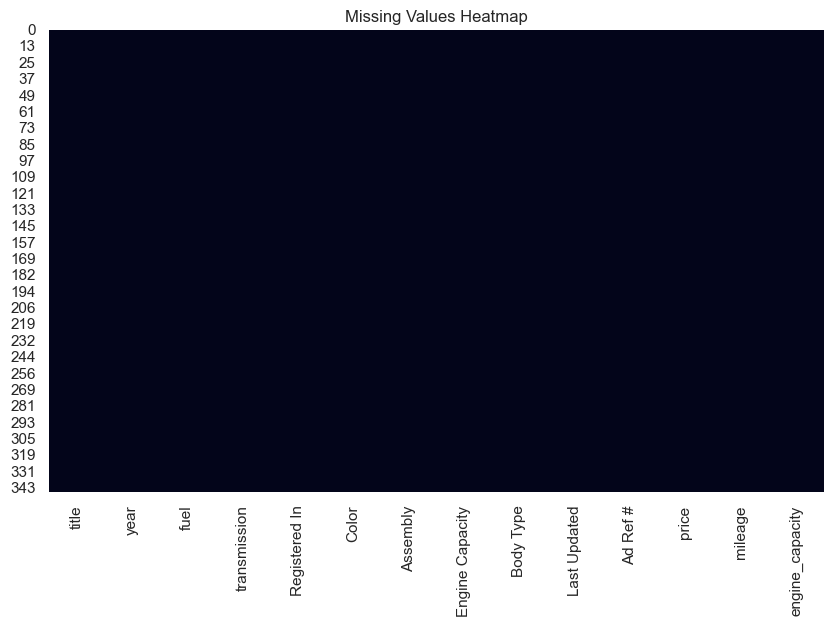

title              0
year               0
fuel               0
transmission       0
Registered In      0
Color              0
Assembly           0
Engine Capacity    0
Body Type          0
Last Updated       0
Ad Ref #           0
price              0
mileage            0
engine_capacity    0
dtype: int64

In [110]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

df.isnull().sum()


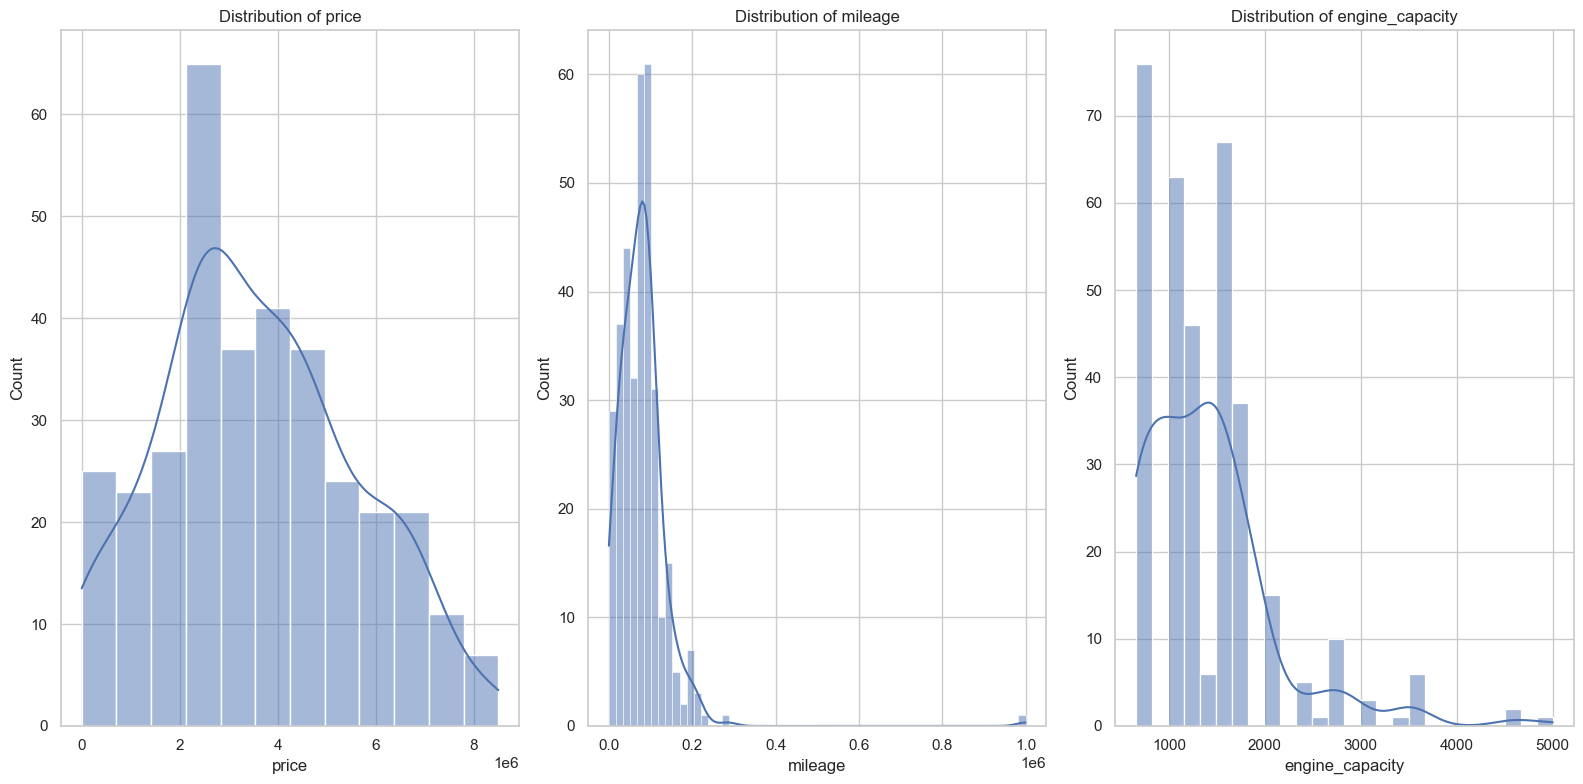

In [111]:
num_cols = ["price", "mileage", "engine_capacity"]

plt.figure(figsize=(16,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


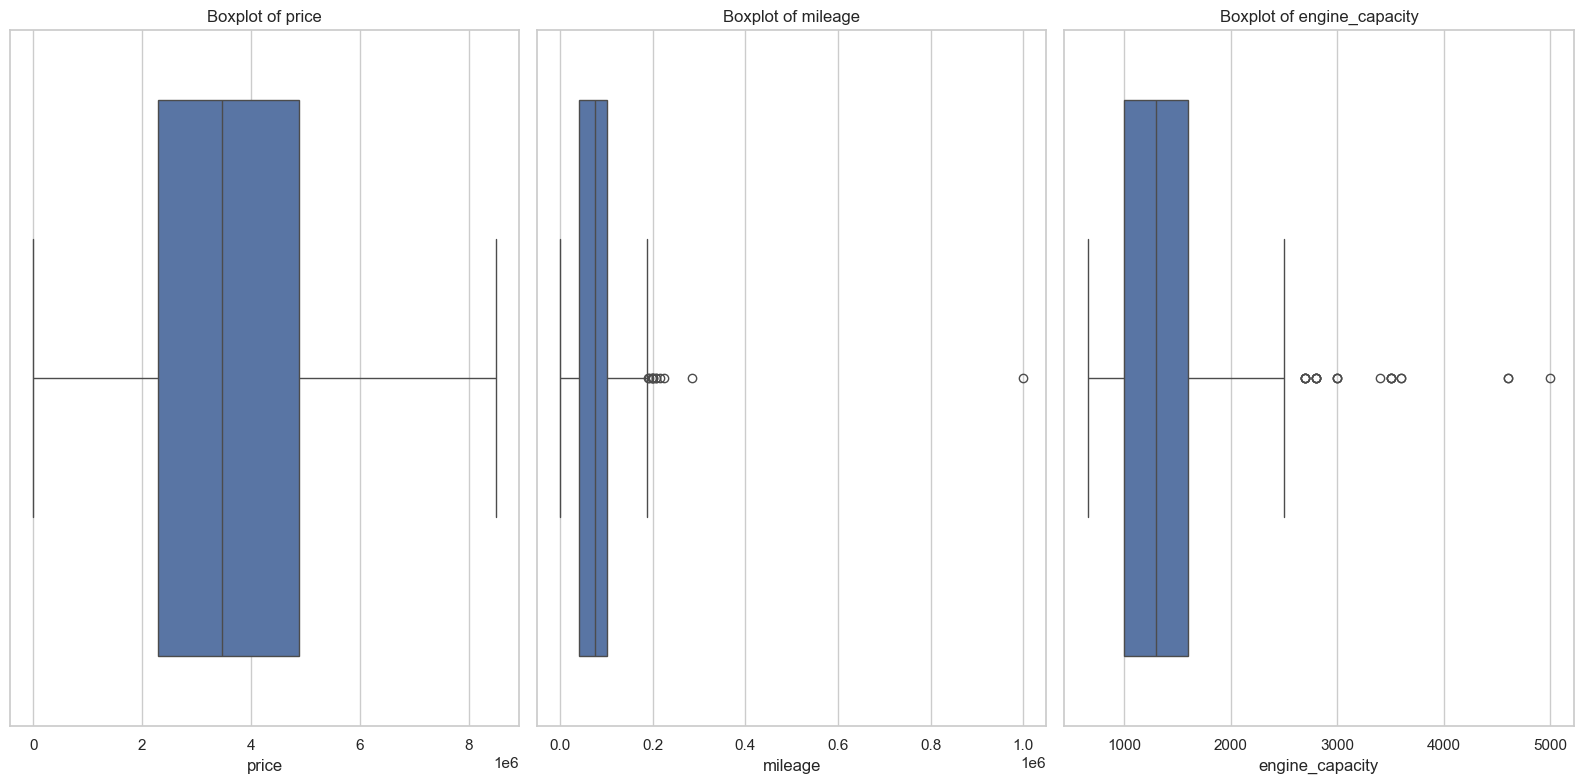

In [112]:
# Box plots for outliers detection
plt.figure(figsize=(16,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


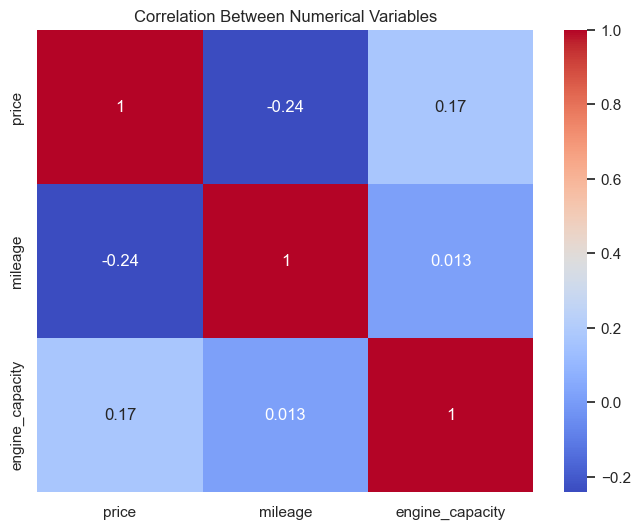

In [113]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numerical Variables")
plt.show()


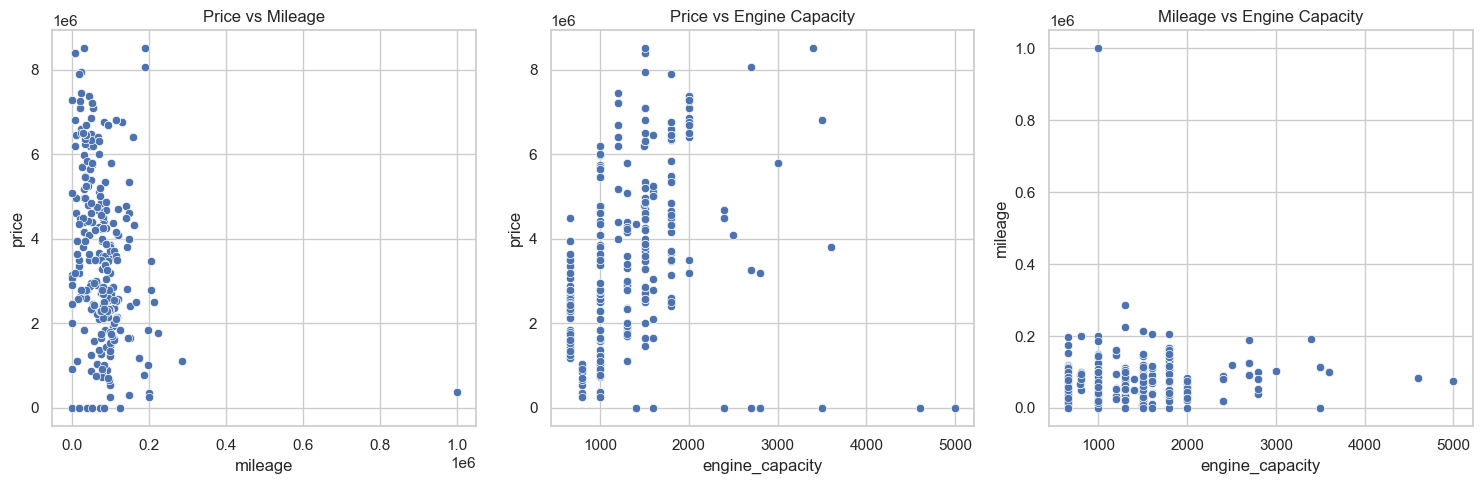

In [114]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x="mileage", y="price")
plt.title("Price vs Mileage")

plt.subplot(1,3,2)
sns.scatterplot(data=df, x="engine_capacity", y="price")
plt.title("Price vs Engine Capacity")

plt.subplot(1,3,3)
sns.scatterplot(data=df, x="engine_capacity", y="mileage")
plt.title("Mileage vs Engine Capacity")

plt.tight_layout()
plt.show()


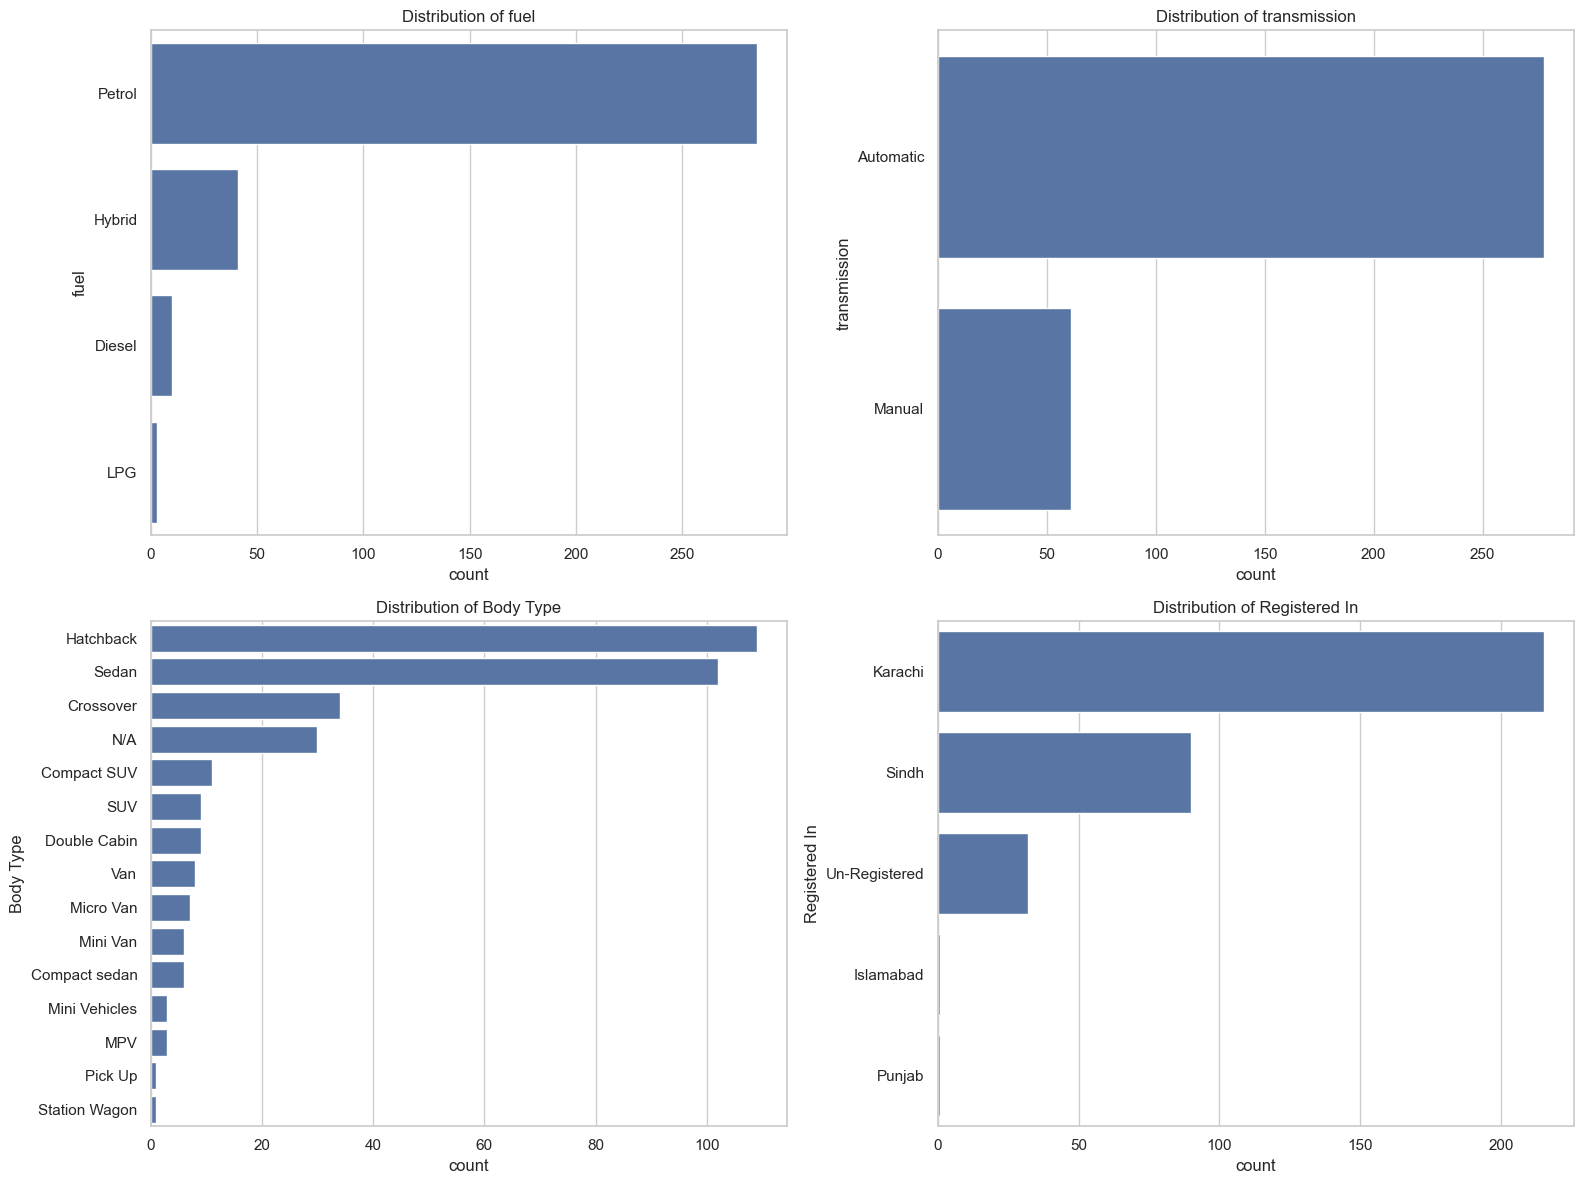

In [115]:
cat_cols = ["fuel", "transmission", "Body Type", "Registered In"]

plt.figure(figsize=(16,12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


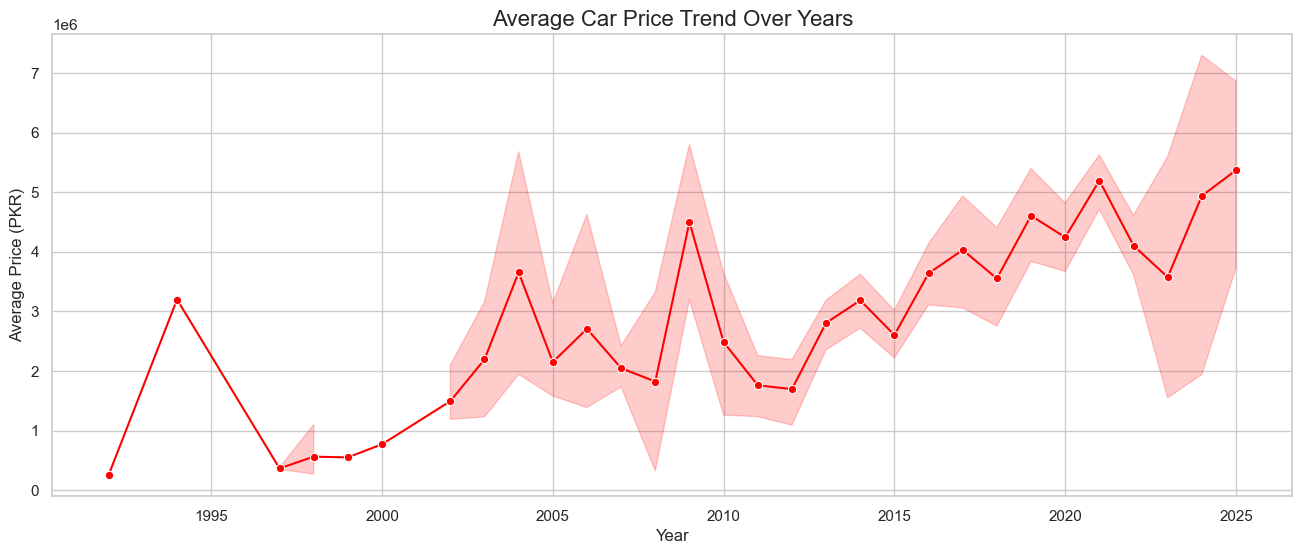

In [116]:
plt.figure(figsize=(16, 6))

# This calculates the average price for each year and plots a line
sns.lineplot(data=df, x='year', y='price', marker='o', color='red')

plt.title("Average Car Price Trend Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price (PKR)", fontsize=12)
plt.grid(True)

plt.show()

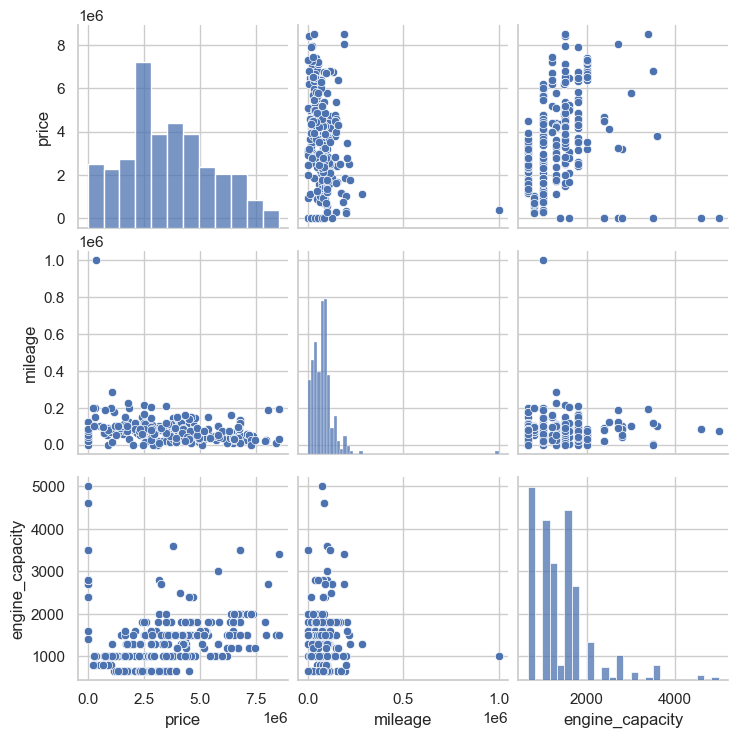

In [117]:
sns.pairplot(df[num_cols])
plt.show()


In [94]:
df

,title,year,fuel,transmission,Registered In,Color,Assembly,Engine Capacity,Body Type,Last Updated,Ad Ref #,price,mileage,engine_capacity
0,Toyota Raize 2020 Z for Sale,2020,Petrol,Automatic,Un-Registered,Black Mica Metallic,Imported,1000 cc,Crossover,"Nov 20, 2025",10848041,6200000.0,48000,1000.0
1,Toyota Estima 2010 Hybrid for Sale,2010,Hybrid,Automatic,Sindh,Black,Imported,2400 cc,Mini Van,"Nov 20, 2025",10709875,4675000.0,90000,2400.0
2,Honda Vezel 2014 Hybrid X for Sale,2014,Hybrid,Automatic,Karachi,Black,Imported,1500 cc,Crossover,"Nov 20, 2025",10686699,3950000.0,79000,1500.0
4,Honda Civic 2018 Oriel 1.8 i-VTEC CVT for Sale,2018,Petrol,Automatic,Sindh,Lunar Silver Metallic,Local,1800 cc,Sedan,"Nov 20, 2025",10795768,4650000.0,71000,1800.0
5,Toyota Corolla 2022 Altis Grande X CVT-i 1.8 ...,2022,Petrol,Automatic,Karachi,Black,Local,1800 cc,Sedan,"Nov 20, 2025",10847931,6600000.0,24000,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Suzuki Alto 2019 VXR AGS for Sale,2019,Petrol,Automatic,Sindh,White,Local,660 cc,Hatchback,"Nov 19, 2025",10846792,2440000.0,58000,660.0
342,Toyota Corolla Axio 2014 Hybrid 1.5 for Sale,2014,Hybrid,Automatic,Karachi,Black,Imported,1500 cc,Sedan,"Nov 19, 2025",10761189,3875000.0,89000,1500.0
343,Toyota Vitz 2019 1.0F Safety Edition III for ...,2019,Petrol,Automatic,Karachi,Red,Imported,1000 cc,Hatchback,"Nov 19, 2025",10780889,4350000.0,18585,1000.0
344,Nissan Serena 2019 e-POWER Highway Star for Sale,2019,Hybrid,Automatic,Karachi,Burgundy,Imported,1200 cc,Van,"Nov 19, 2025",10761582,6400000.0,160500,1200.0


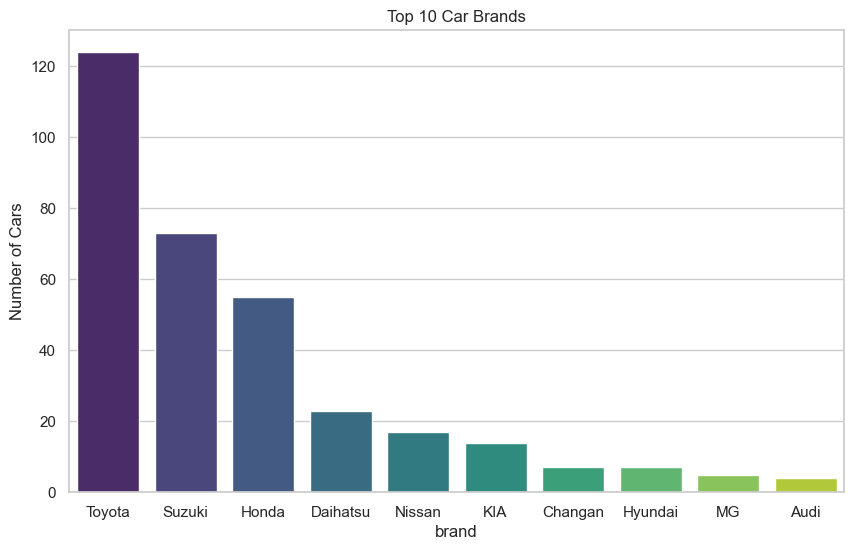

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of df to avoid SettingWithCopyWarning
df = df.copy()

# Extract brand from title
df.loc[:, 'brand'] = df['title'].str.split(' ').str[0]

# Get top 10 brands
top_brands = df['brand'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values,
hue=top_brands.index,  # map x to hue
dodge=False,            # prevents separation of bars
palette="viridis",
legend=False)
plt.title('Top 10 Car Brands')
plt.ylabel('Number of Cars')
plt.show()